 # Comparison of Fake News Detection Techniques using various Machine Learning Approaches

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import data sets
df_true = pd.read_csv("True.csv")
df_fake = pd.read_csv("Fake.csv")

In [3]:
df_true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [4]:
df_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [5]:
df_true.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
title      21417 non-null object
text       21417 non-null object
subject    21417 non-null object
date       21417 non-null object
dtypes: object(4)
memory usage: 669.4+ KB


In [6]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
title      23481 non-null object
text       23481 non-null object
subject    23481 non-null object
date       23481 non-null object
dtypes: object(4)
memory usage: 733.9+ KB


In [7]:
df_true.dtypes

title      object
text       object
subject    object
date       object
dtype: object

In [8]:
df_fake.dtypes

title      object
text       object
subject    object
date       object
dtype: object

In [9]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [10]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [11]:
df_true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [12]:
df_fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [13]:
df_true['label'] = 1
df_true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [14]:
df_fake['label'] = 0
df_fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [15]:
df_merge = pd.concat([df_true, df_fake]).reset_index(drop = True)
df_merge.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [16]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
title      44898 non-null object
text       44898 non-null object
subject    44898 non-null object
date       44898 non-null object
label      44898 non-null int64
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [17]:
T = df_merge
T = T.sample(frac=1)
T.head()

,title,text,subject,date,label
11282,Reuters journalists in Myanmar appear in court...,YANGON (Reuters) - Two Reuters journalists who...,worldnews,"December 27, 2017",1
6818,"In Trump stronghold, factories are humming but...","GRAND RAPIDS, Mich./WASHINGTON (Reuters) - Whe...",politicsNews,"December 9, 2016",1
39393,NATIONAL PET CHAIN Linked To Outbreak of Bacte...,The CDC is investigating an outbreak of a bact...,left-news,"Sep 14, 2017",0
17267,U.S.-backed militia to capture last Raqqa area...,BEIRUT (Reuters) - The spokesman for the U.S.-...,worldnews,"October 17, 2017",1
40810,DIRTY JOBS’ MIKE ROWE: Great Opportunities Out...,,left-news,"Dec 27, 2016",0


In [18]:
df_merge.drop(columns = ['date'], inplace = True)

In [19]:
df_merge.head()

,title,text,subject,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1


In [20]:
df_merge['total'] = df_merge['title'] + ' ' + df_merge['text']
df_merge.head()

,title,text,subject,label,total
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1,Trump wants Postal Service to charge 'much mor...


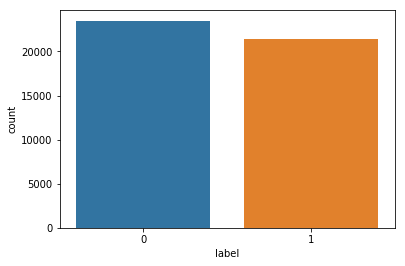

In [21]:
sns.countplot(df_merge['label'],label='Count')

In [22]:
df_merge.describe()

,label
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [23]:
df_true.describe()


,label
count,21417.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [24]:
df_fake.describe()

,label
count,23481.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [25]:
print(df_true.shape)
print(df_fake.shape)
print(df_merge.shape)

(21417, 5)
(23481, 5)
(44898, 5)


In [26]:
df_merge['total'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

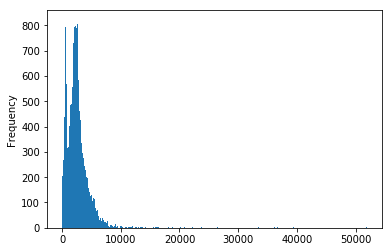

In [27]:
df_merge['total'].apply(len).plot(bins=1000,kind='hist')

In [28]:
 !pip install gensim

You should consider upgrading via the 'c:\users\saipraveen\anaconda3\python.exe -m pip install --upgrade pip' command.


In [29]:
#import wordcloud, nltk 
from wordcloud import WordCloud, STOPWORDS

import nltk
import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

C:\Users\Saipraveen\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [30]:

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Saipraveen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [32]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
#Text Cleaning 
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
            
    return result

In [34]:
df_merge['clean'] = df_merge['total'].apply(preprocess)
df_merge['clean'][0]

['budget',
 'fight',
 'looms',
 'republicans',
 'flip',
 'fiscal',
 'script',
 'washington',
 'reuters',
 'head',
 'conservative',
 'republican',
 'faction',
 'congress',
 'voted',
 'month',
 'huge',
 'expansion',
 'national',
 'debt',
 'cuts',
 'called',
 'fiscal',
 'conservative',
 'sunday',
 'urged',
 'budget',
 'restraint',
 'keeping',
 'sharp',
 'pivot',
 'republicans',
 'representative',
 'mark',
 'meadows',
 'speaking',
 'face',
 'nation',
 'drew',
 'hard',
 'line',
 'federal',
 'spending',
 'lawmakers',
 'bracing',
 'battle',
 'january',
 'return',
 'holidays',
 'wednesday',
 'lawmakers',
 'begin',
 'trying',
 'pass',
 'federal',
 'budget',
 'fight',
 'likely',
 'linked',
 'issues',
 'immigration',
 'policy',
 'november',
 'congressional',
 'election',
 'campaigns',
 'approach',
 'republicans',
 'seek',
 'control',
 'congress',
 'president',
 'donald',
 'trump',
 'republicans',
 'want',
 'budget',
 'increase',
 'military',
 'spending',
 'democrats',
 'want',
 'proportional',
 '

In [35]:
df_merge.head()

,title,text,subject,label,total,clean
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,"As U.S. budget fight looms, Republicans flip t...","[budget, fight, looms, republicans, flip, fisc..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,U.S. military to accept transgender recruits o...,"[military, accept, transgender, recruits, mond..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,Senior U.S. Republican senator: 'Let Mr. Muell...,"[senior, republican, senator, mueller, washing..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1,FBI Russia probe helped by Australian diplomat...,"[russia, probe, helped, australian, diplomat, ..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1,Trump wants Postal Service to charge 'much mor...,"[trump, wants, postal, service, charge, amazon..."


In [36]:
words = []
for i in df_merge.clean:
    for j in i:
        words.append(j)

In [37]:
words

['budget',
 'fight',
 'looms',
 'republicans',
 'flip',
 'fiscal',
 'script',
 'washington',
 'reuters',
 'head',
 'conservative',
 'republican',
 'faction',
 'congress',
 'voted',
 'month',
 'huge',
 'expansion',
 'national',
 'debt',
 'cuts',
 'called',
 'fiscal',
 'conservative',
 'sunday',
 'urged',
 'budget',
 'restraint',
 'keeping',
 'sharp',
 'pivot',
 'republicans',
 'representative',
 'mark',
 'meadows',
 'speaking',
 'face',
 'nation',
 'drew',
 'hard',
 'line',
 'federal',
 'spending',
 'lawmakers',
 'bracing',
 'battle',
 'january',
 'return',
 'holidays',
 'wednesday',
 'lawmakers',
 'begin',
 'trying',
 'pass',
 'federal',
 'budget',
 'fight',
 'likely',
 'linked',
 'issues',
 'immigration',
 'policy',
 'november',
 'congressional',
 'election',
 'campaigns',
 'approach',
 'republicans',
 'seek',
 'control',
 'congress',
 'president',
 'donald',
 'trump',
 'republicans',
 'want',
 'budget',
 'increase',
 'military',
 'spending',
 'democrats',
 'want',
 'proportional',
 '

In [38]:
len(words)

9276947

In [39]:
total_words = len(list(set(words)))

In [40]:
total_words

108704

In [41]:
df_merge['clean_total'] = df_merge['clean'].apply(lambda x: " ".join(x))

In [42]:
df_merge.head()

,title,text,subject,label,total,clean,clean_total
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,"As U.S. budget fight looms, Republicans flip t...","[budget, fight, looms, republicans, flip, fisc...",budget fight looms republicans flip fiscal scr...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,U.S. military to accept transgender recruits o...,"[military, accept, transgender, recruits, mond...",military accept transgender recruits monday pe...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,Senior U.S. Republican senator: 'Let Mr. Muell...,"[senior, republican, senator, mueller, washing...",senior republican senator mueller washington r...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1,FBI Russia probe helped by Australian diplomat...,"[russia, probe, helped, australian, diplomat, ...",russia probe helped australian diplomat washin...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1,Trump wants Postal Service to charge 'much mor...,"[trump, wants, postal, service, charge, amazon...",trump wants postal service charge amazon shipm...


In [43]:
df_merge['clean_total'][0]

'budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats saying need government raise 

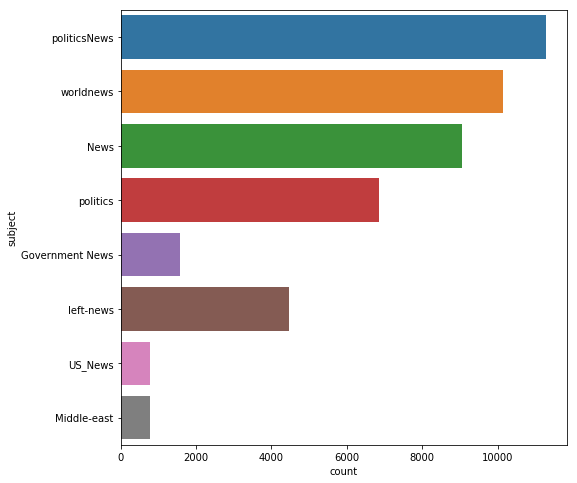

In [44]:
#countplot of subjects
plt.figure(figsize = (8, 8))
sns.countplot(y = "subject", data = df_merge)

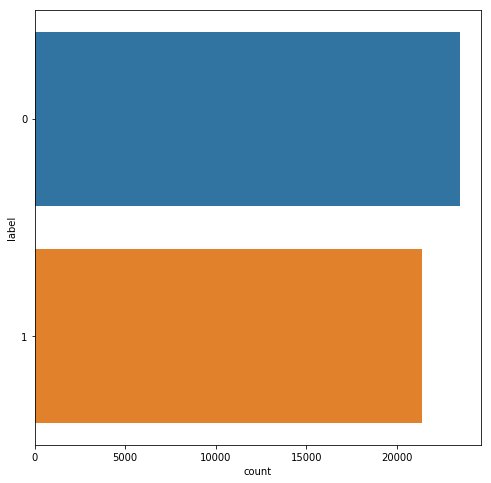

In [45]:
#count plot of labels
plt.figure(figsize = (8, 8))
sns.countplot(y = "label", data = df_merge)

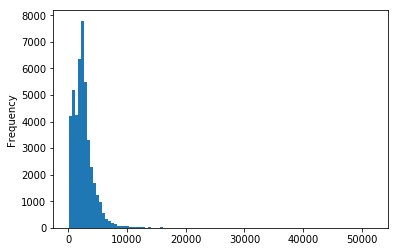

In [46]:
#histogram of length of news articles
df_merge['total'].apply(len).plot(bins=100,kind='hist')

In [47]:
nltk.download('punkt')

nltk.word_tokenize(df_merge['clean_total'][0])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Saipraveen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['budget',
 'fight',
 'looms',
 'republicans',
 'flip',
 'fiscal',
 'script',
 'washington',
 'reuters',
 'head',
 'conservative',
 'republican',
 'faction',
 'congress',
 'voted',
 'month',
 'huge',
 'expansion',
 'national',
 'debt',
 'cuts',
 'called',
 'fiscal',
 'conservative',
 'sunday',
 'urged',
 'budget',
 'restraint',
 'keeping',
 'sharp',
 'pivot',
 'republicans',
 'representative',
 'mark',
 'meadows',
 'speaking',
 'face',
 'nation',
 'drew',
 'hard',
 'line',
 'federal',
 'spending',
 'lawmakers',
 'bracing',
 'battle',
 'january',
 'return',
 'holidays',
 'wednesday',
 'lawmakers',
 'begin',
 'trying',
 'pass',
 'federal',
 'budget',
 'fight',
 'likely',
 'linked',
 'issues',
 'immigration',
 'policy',
 'november',
 'congressional',
 'election',
 'campaigns',
 'approach',
 'republicans',
 'seek',
 'control',
 'congress',
 'president',
 'donald',
 'trump',
 'republicans',
 'want',
 'budget',
 'increase',
 'military',
 'spending',
 'democrats',
 'want',
 'proportional',
 '

In [48]:
maxlen = -1
for x in df_merge.clean:
    if(len(x) > maxlen):
        maxlen = len(x)
maxlen

4405

In [49]:
import sys
minlen = sys.maxsize
for x in df_merge.clean:
    if(len(x) < minlen):
        minlen = len(x)
minlen

2

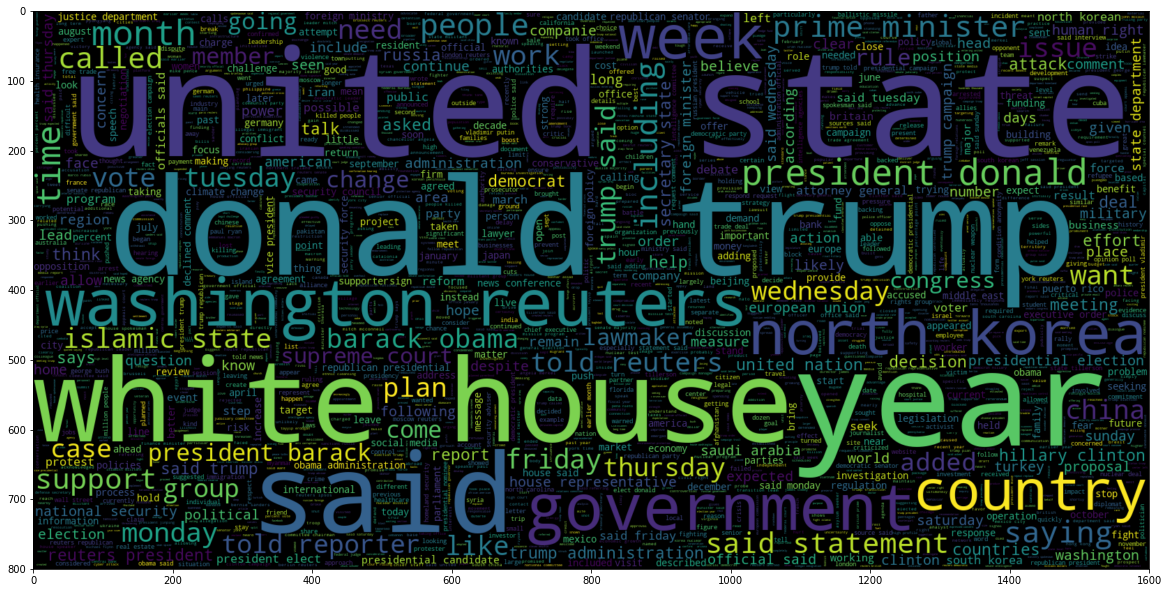

In [50]:
#Word Cloud of TRUE Data
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df_merge[df_merge.label == 1].clean_total))
plt.imshow(wc, interpolation = 'bilinear')

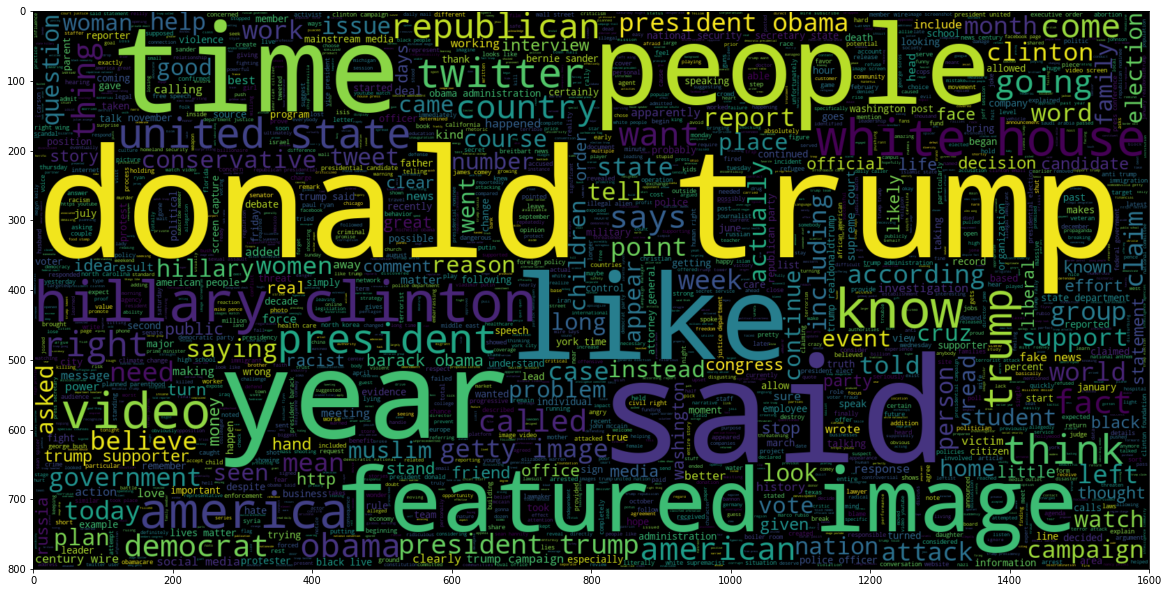

In [51]:
#Word  Cloud of FAKE Data
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df_merge[df_merge.label == 0].clean_total))
plt.imshow(wc, interpolation = 'bilinear')

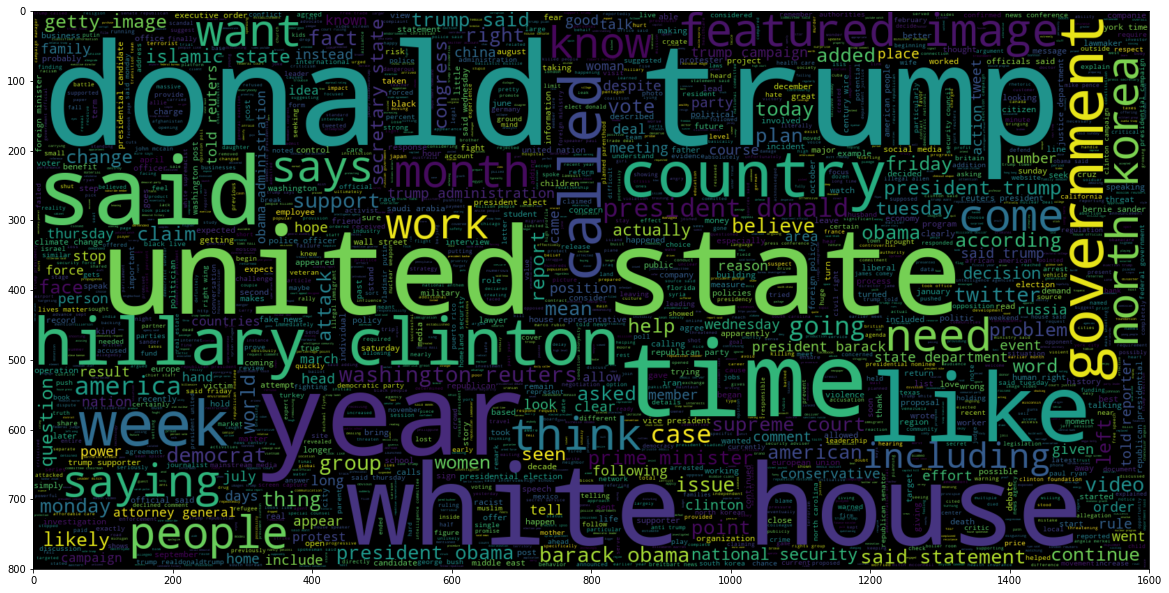

In [52]:
#Word Cloud for Entire Data
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df_merge.clean_total))
plt.imshow(wc, interpolation = 'bilinear')

In [53]:
t = [df_merge['clean_total'],df_merge['label']]
headers = ["data","label"]
df = pd.concat(t,axis=1,keys=headers)

In [54]:
df.head()

,data,label
0,budget fight looms republicans flip fiscal scr...,1
1,military accept transgender recruits monday pe...,1
2,senior republican senator mueller washington r...,1
3,russia probe helped australian diplomat washin...,1
4,trump wants postal service charge amazon shipm...,1


In [55]:
#Dividing Data into Training and Testing data sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.data,df.label,test_size=0.2)

In [56]:
#import CountVectorizer,TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
#CountVectorizer
count_vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english') 
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [58]:
#Naive Bayes with CountVectorizer
from sklearn.naive_bayes import MultinomialNB

nb_clf = MultinomialNB(alpha = 0.15)
nb_clf.fit(count_train, y_train)
pred_nb_count = nb_clf.predict(count_test) 
acc_nb_count = metrics.accuracy_score(y_test, pred_nb_count)
print(acc_nb_count)

0.9743875278396437


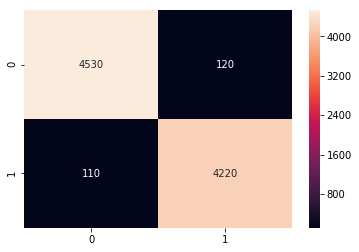

In [59]:
from sklearn.metrics import confusion_matrix
nb_count_cm = confusion_matrix(y_test,pred_nb_count)
sns.heatmap(nb_count_cm,annot=True,fmt="d")

In [60]:
#Logistic Regression with CountVectorizer
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=10000)
logreg.fit(count_train, y_train)
pred_logreg_count = logreg.predict(count_test)
acc_logreg_count = metrics.accuracy_score(y_test,pred_logreg_count)
print(acc_logreg_count)

0.9969933184855234


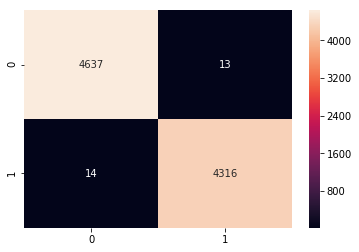

In [61]:
logreg_count_cm = confusion_matrix(y_test,pred_logreg_count)
sns.heatmap(logreg_count_cm,annot=True,fmt="d")

In [62]:
#KNN with CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
neigh2 = KNeighborsClassifier(n_neighbors=2)
neigh2.fit(count_train, y_train)
pred_knn2_count = neigh2.predict(count_test)
acc_knn2_count = metrics.accuracy_score(y_test,pred_knn2_count)
print(acc_knn2_count)

0.7448775055679288


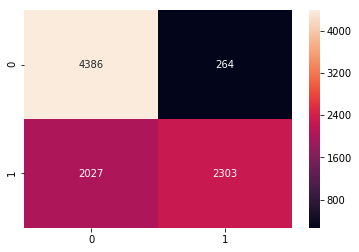

In [63]:
knn_count_cm = confusion_matrix(y_test,pred_knn2_count)
sns.heatmap(knn_count_cm,annot=True,fmt="d")

In [64]:
#Passive Aggressive Classifier with CountVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier

linear_clf = PassiveAggressiveClassifier(max_iter=100)
linear_clf.fit(count_train, y_train)
pred_linear_count = linear_clf.predict(count_test)
acc_linear_count = metrics.accuracy_score(y_test, pred_linear_count)
print(acc_linear_count)

0.9935412026726058


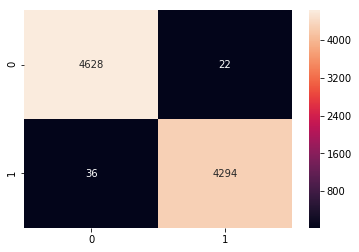

In [65]:
pag_count_cm = confusion_matrix(y_test,pred_linear_count)
sns.heatmap(pag_count_cm,annot=True,fmt="d")

In [66]:
#Decision Tree with CountVectorizer
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(count_train,y_train)
pred_dtree_count = dtree.predict(count_test)
acc_dtree_count = metrics.accuracy_score(y_test,pred_dtree_count)
print(acc_dtree_count)

0.9973273942093541


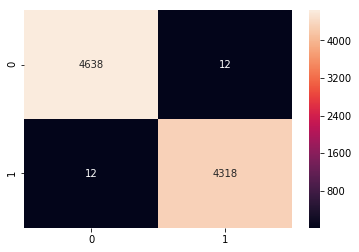

In [67]:
dtree_count_cm = confusion_matrix(y_test,pred_dtree_count)
sns.heatmap(dtree_count_cm,annot=True,fmt="d")

In [68]:
#Random Forest with CountVectorizer
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=25,random_state=0)
rfc.fit(count_train,y_train)
pred_rf_count = rfc.predict(count_test)
acc_rf_count = metrics.accuracy_score(y_test,pred_rf_count)
print(acc_rf_count)

0.9608017817371938


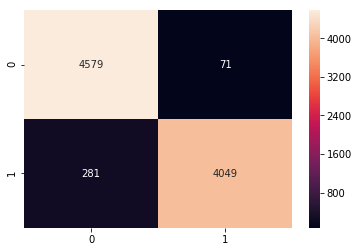

In [69]:
rf_count_cm = confusion_matrix(y_test,pred_rf_count)
sns.heatmap(rf_count_cm,annot=True,fmt="d")

In [70]:
#RidgeClassifier with Count Vectorizer
from sklearn.linear_model import RidgeClassifier
rd_clf = RidgeClassifier()
rd_clf.fit(count_train,y_train)
pred_rd_count = rd_clf.predict(count_test)
acc_rd_count = metrics.accuracy_score(y_test,pred_rd_count)
print(acc_rd_count)

0.9969933184855234


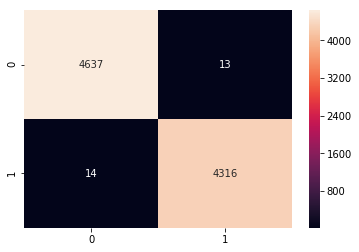

In [71]:
rd_count_cm = confusion_matrix(y_test,pred_rd_count)
sns.heatmap(rd_count_cm,annot=True,fmt="d")

In [72]:
#TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [73]:
#NaiveBayes with TF-IDF
nb_clfr = MultinomialNB(alpha = 0.15)
nb_clfr.fit(tfidf_train, y_train)
pred_nb_tfidf = nb_clfr.predict(tfidf_test) 
acc_nb_tfidf = metrics.accuracy_score(y_test, pred_nb_tfidf)
print(acc_nb_tfidf)

0.966369710467706


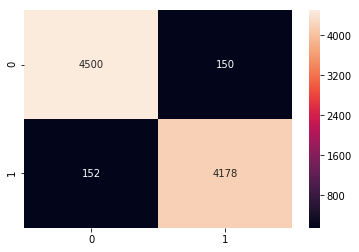

In [74]:
nb_tfidf_cm = confusion_matrix(y_test,pred_nb_tfidf)
sns.heatmap(nb_tfidf_cm,annot=True,fmt="d")

In [75]:
#Logistic Regression with TF-IDF
logregr = LogisticRegression()
logregr.fit(tfidf_train, y_train)
pred_logreg_tfidf = logregr.predict(tfidf_test)
acc_logreg_tfidf = metrics.accuracy_score(y_test,pred_logreg_tfidf)
print(acc_logreg_tfidf)

0.9838530066815144


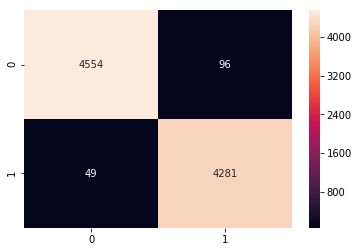

In [76]:
logreg_tfidf_cm = confusion_matrix(y_test,pred_logreg_tfidf)
sns.heatmap(logreg_tfidf_cm,annot=True,fmt="d")

In [77]:
#Decison Tree with TF-IDF
dtree2 = DecisionTreeClassifier(random_state=0)
dtree2.fit(tfidf_train,y_train)
pred_dtree_tfidf = dtree2.predict(tfidf_test)
acc_dtree_tfidf = metrics.accuracy_score(y_test,pred_dtree_tfidf)
print(acc_dtree_tfidf)

0.9966592427616926


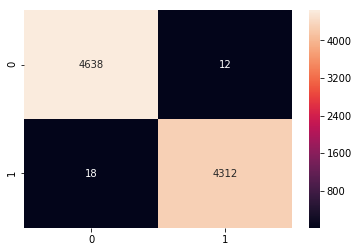

In [78]:
dtree_tfidf_cm = confusion_matrix(y_test,pred_dtree_tfidf)
sns.heatmap(dtree_tfidf_cm,annot=True,fmt="d")

In [79]:
#Passive Aggressive Classifier with TF-IDF
linear2_clf = PassiveAggressiveClassifier(max_iter=100)
linear2_clf.fit(tfidf_train, y_train)
pred_linear_tfidf = linear2_clf.predict(tfidf_test)
acc_linear_tfidf = metrics.accuracy_score(y_test, pred_linear_tfidf)
print(acc_linear_tfidf)

0.9929844097995546


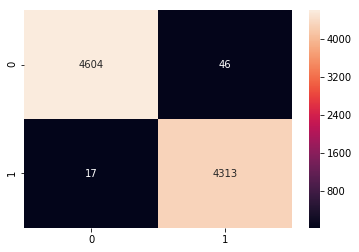

In [80]:
pag_tfidf_cm = confusion_matrix(y_test,pred_linear_tfidf)
sns.heatmap(pag_tfidf_cm,annot=True,fmt="d")

In [81]:
#KNN with TF-IDF
neigh3 = KNeighborsClassifier(n_neighbors=2)
neigh3.fit(tfidf_train, y_train)
pred_knn2_tfidf = neigh3.predict(tfidf_test)
acc_knn2_tfidf = metrics.accuracy_score(y_test,pred_knn2_tfidf)
print(acc_knn2_count)

0.7448775055679288


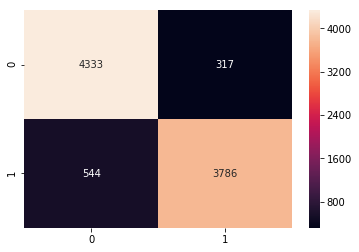

In [82]:
knn2_tfidf_cm = confusion_matrix(y_test,pred_knn2_tfidf)
sns.heatmap(knn2_tfidf_cm,annot=True,fmt="d")

In [83]:
#Random Forest with TF-IDF
rft1 = RandomForestClassifier(random_state=0)
rft1.fit(tfidf_train,y_train)
pred_rf_tfidf1 = rft1.predict(tfidf_test)
acc_rf_tfidf1 = metrics.accuracy_score(y_test,pred_rf_tfidf1)
print(acc_rf_tfidf1)

0.9830734966592427


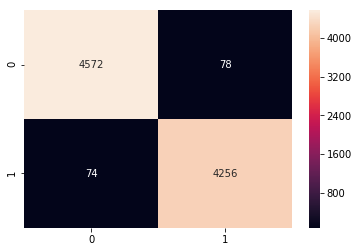

In [84]:
rf_tfidf_cm = confusion_matrix(y_test,pred_rf_tfidf1)
sns.heatmap(rf_tfidf_cm,annot=True,fmt="d")

In [85]:
#RidgeClassifier with TF-IDF
rdt_clf = RidgeClassifier()
rdt_clf.fit(tfidf_train,y_train)
pred_rd_tfidf = rdt_clf.predict(tfidf_test)
acc_rd_tfidf = metrics.accuracy_score(y_test,pred_rd_tfidf)
print(acc_rd_tfidf)

0.9934298440979955


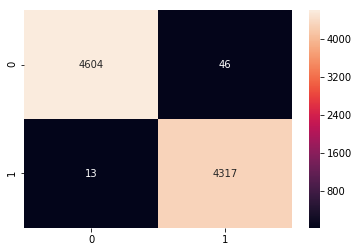

In [86]:
rd_tfidf_cm = confusion_matrix(y_test,pred_rd_tfidf)
sns.heatmap(rd_tfidf_cm,annot=True,fmt="d")

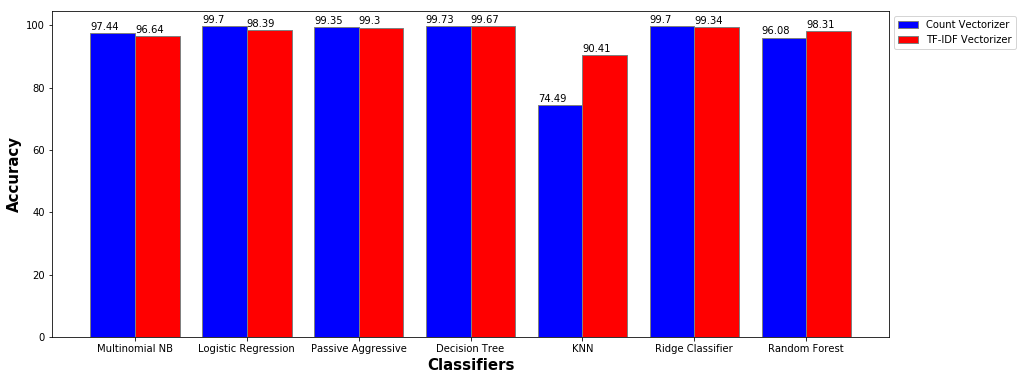

In [87]:
#Barplot of accuracy of models
barWidth = 0.4
fig = plt.subplots(figsize =(15,6))

a = [acc_nb_count,acc_logreg_count,acc_linear_count,acc_dtree_count,acc_knn2_count,acc_rd_count,acc_rf_count]
b = [acc_nb_tfidf,acc_logreg_tfidf,acc_linear_tfidf,acc_dtree_tfidf,acc_knn2_tfidf,acc_rd_tfidf,acc_rf_tfidf1]

CV = [x*100 for x in a]
TFIDF = [x*100 for x in b]

br1 = np.arange(len(CV))
br2 = [x + barWidth for x in br1]

plt.bar(br1, CV, color ='b', width = barWidth,edgecolor ='grey', label ='Count Vectorizer')
for i in range(len(CV)):
        plt.text(i-0.2,CV[i]+1,round(CV[i],2))

plt.bar(br2, TFIDF, color ='r', width = barWidth,edgecolor ='grey', label ='TF-IDF Vectorizer')
for i in range(len(TFIDF)):
        plt.text(i+0.2,TFIDF[i]+1,round(TFIDF[i],2))

# plt.title('Barplot of accuracies of classifiers',fontsize=20,fontweight='bold')
plt.xlabel('Classifiers', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([ (r+0.2)  for r in range(len(TFIDF))],['Multinomial NB', 'Logistic Regression', 'Passive Aggressive', 'Decision Tree', 'KNN','Ridge Classifier','Random Forest'])

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')     
plt.show()